In [7]:
from keras import layers
from keras.models import Sequential
from keras.losses import MeanSquaredError

autoencoder = Sequential(
    [
        layers.Input(784),
        layers.Dense(392, activation='sigmoid', name='hidden'),
        layers.Dense(784, activation=None, name='output')
    ]
)

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 392)               307720    
                                                                 
 output (Dense)              (None, 784)               308112    
                                                                 
Total params: 615,832
Trainable params: 615,832
Non-trainable params: 0
_________________________________________________________________


In [8]:
# now we compile the model with the optimizer and loss
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

In [9]:
from keras.datasets import mnist
import numpy as np

# load mnist data
(x_train, _), (x_test, _) = mnist.load_data()

# we now normalize the data and flatten the images from 28x28 to 784
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [10]:
# and now we train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0388 - val_loss: 0.0173
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0128 - val_loss: 0.0094
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0079 - val_loss: 0.0065
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0046 - val_loss: 0.0041
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0022 - val_loss: 0.0

In [11]:
from keras.models import Model

encoder = Model(
    inputs=autoencoder.inputs,
    outputs=autoencoder.get_layer(name='hidden').output,
)

decoder = Model(
    inputs=autoencoder.get_layer(name='hidden').output,
    outputs=autoencoder.get_layer(name='output').output,
)

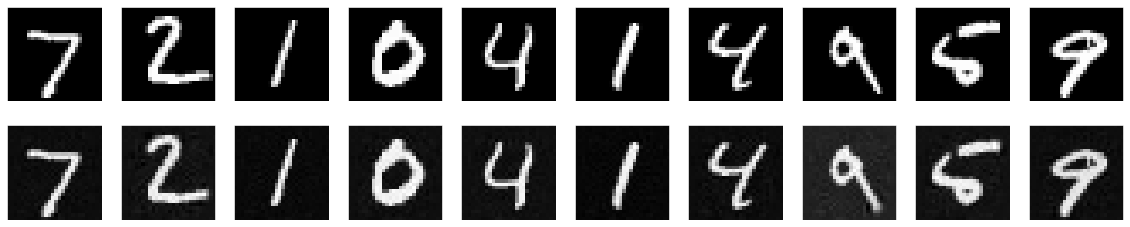

In [12]:
import matplotlib.pyplot as plt

# for the test set, we now encode and decode some images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()